# Problem Statement:
Imagine you are working as a Data Analyst for a Police Department. ● The Police Captain would like to perform a detailed analysis of the crime committed in your jurisdiction in the year 2016 (Yes !! the data is old since the police department is still catching up with digitalization).
● The idea is to extract actionable insights from the analysis for improving the overall safety of the city by learning from past experiences.
● The problem statement is open-ended by design. The captain is not aware of the pre-existing patterns and trends that are to be uncovered through the dataset. He is relying on you to unearth interesting insights. So be creative. The safety of your city depends on you !!! 

# Data Description
The Data Description is as follows :

○ incident_id - A number assigned to each incident reported. 

○ category - Category of the incident reported 

○ crime_description - Description explaining the nature of the crime. ○ crime_date - date on which the crime was reported.

 ○ department_district - district in which the police department is located. 
 
 ○ resolution - Details of resolution (if any). 
 
 ○ address - Address where the crime occurred. 
 
 ○ department_id - police department id. 
 
 ○ location - lat-long location where the crime was committed.


In [ ]:
#Mounted my drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Loading the data
data = pd.read_csv("/content/drive/My Drive/police_department_data.csv")

In [ ]:
#Viewing first 5 rows of the dataset
data.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"


In [ ]:
#Checking the shape of the data
data.shape

(150500, 9)

In [ ]:
#Checking for missing values
data.isnull().sum()

incident_id            0
category               0
crime_description      0
crime_date             0
department_district    1
resolution             0
address                0
department_id          0
location               0
dtype: int64

In [ ]:
#looking for the observation with missing values
data['location'][data['department_district'].isnull()]

112851    (37.7082024584902, -122.413351985284)
Name: location, dtype: object

In [ ]:
#Filling missing values with most occuring data
data['department_district'].fillna('SOUTHERN',inplace=True)

In [ ]:
#Making sure all values are there
data.isnull().sum()

incident_id            0
category               0
crime_description      0
crime_date             0
department_district    0
resolution             0
address                0
department_id          0
location               0
dtype: int64

In [ ]:
#Checking for descriptive statistics
data.describe(include='all')

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
count,1.505000e+05,150500,150500,150500,150500,150500,150500,1.505000e+05,150500
unique,NaN,39,726,67140,10,14,16130,NaN,19386
top,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2016-01-01 00:01:00,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,"(37.775420706711, -122.403404791479)"
freq,NaN,40409,17741,68,28446,107780,3561,NaN,3536
mean,1.616440e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.616440e+13,NaN
std,5.535976e+06,NaN,NaN,NaN,NaN,NaN,NaN,5.535976e+11,NaN
min,1.135121e+07,NaN,NaN,NaN,NaN,NaN,NaN,1.135121e+12,NaN
25%,1.603283e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.603283e+13,NaN
50%,1.606541e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.606541e+13,NaN
75%,1.609764e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.609764e+13,NaN


In [ ]:
#Checking the column names
data.columns


Index(['incident_id', 'category', 'crime_description', 'crime_date',
       'department_district', 'resolution', 'address', 'department_id',
       'location'],
      dtype='object')

In [ ]:
#checking the value counts for each data
def column_inspect(data):
    for i in data.columns :
        if data[i].dtype=="object" and i not in ['incident_id','crime_date','location']:
            print("Column: "+ i)
            print(data[i].value_counts())
            print("Column: "+ i + " :-Different values and count in the column ")
            print("="*50)

In [ ]:
column_inspect(data)

Column: category
LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT         

## Feature Engineering

In [ ]:
#Splitting the column 'crime_date' into date and time columns
data['crime_date'] = pd.to_datetime(data['crime_date'])

data['Date'] = data['crime_date'].dt.date
data['Time']=data['crime_date'].dt.time


In [ ]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in data['location']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
data['latitude'] = lat
data['longitude'] = lon


In [ ]:
data.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,Date,Time,latitude,longitude
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)",2016-01-29,11:00:00,(37.775420706711,-122.403404791479)
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)",2016-01-29,11:00:00,(37.775420706711,-122.403404791479)
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)",2016-04-25,14:59:00,(37.7299809672996,-122.388856204292)
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)",2016-01-05,23:50:00,(37.7857883766888,-122.412970537591)
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)",2016-01-01,00:30:00,(37.7650501214668,-122.419671780296)


## Data Visualization

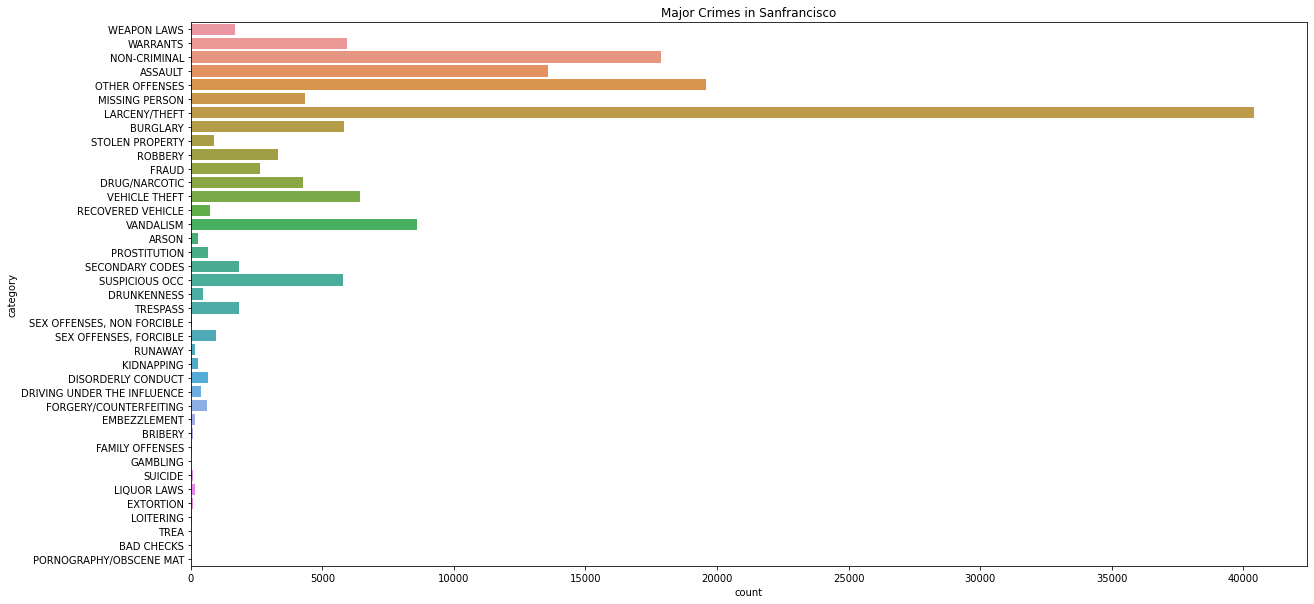

In [ ]:
# plotting different categories of crime

plt.figure(figsize=(20,10))
plt.title('Major Crimes in Sanfrancisco')

sns.countplot(y=data['category'])


plt.show()

In [ ]:
pip install squarify

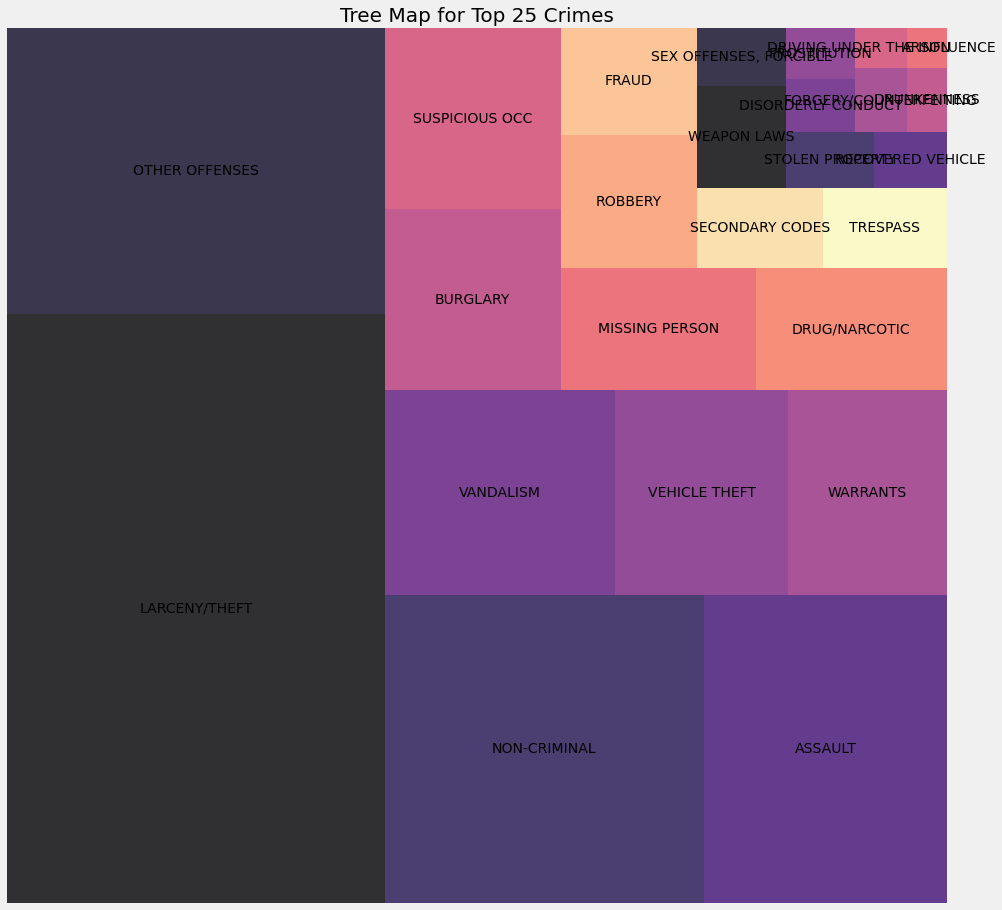

In [ ]:
# plotting a tree map
from matplotlib import cm
import squarify
y = data['category'].value_counts().head(25)
    
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 25 Crimes', fontsize = 20)

plt.axis('off')
plt.show()

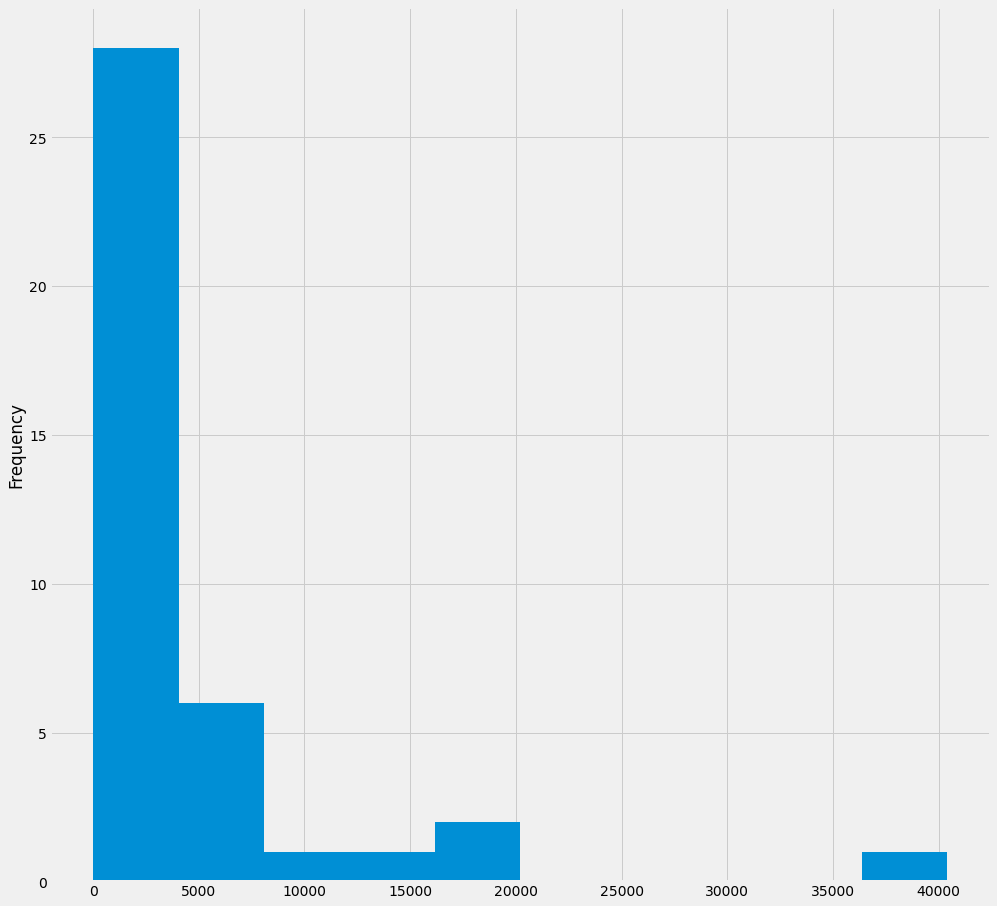

In [ ]:
#Checking the count for column 'category'
data.category.value_counts().plot(kind='hist')

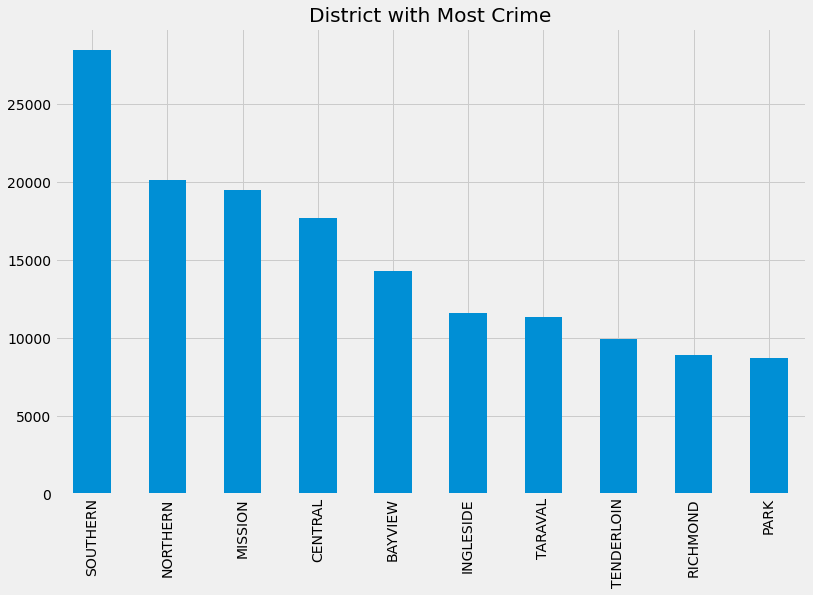

In [ ]:
# Plotting Regions with their count of crimes

plt.figure(figsize=(20,10))
data['department_district'].value_counts().plot.bar(figsize = (12, 8))

plt.title('District with Most Crime')

plt.show()

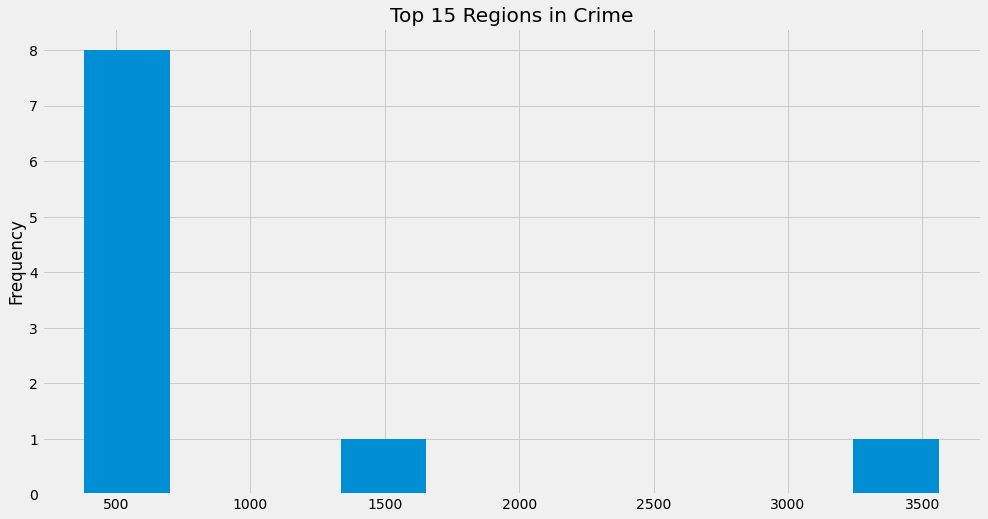

In [ ]:
# Plotting top Regions with frequency of crimes

plt.figure(figsize=(15,8))
plt.title('Top 15 Regions in Crime')
data['address'].value_counts().head(10).plot.hist(figsize=(15,8))
plt.show()

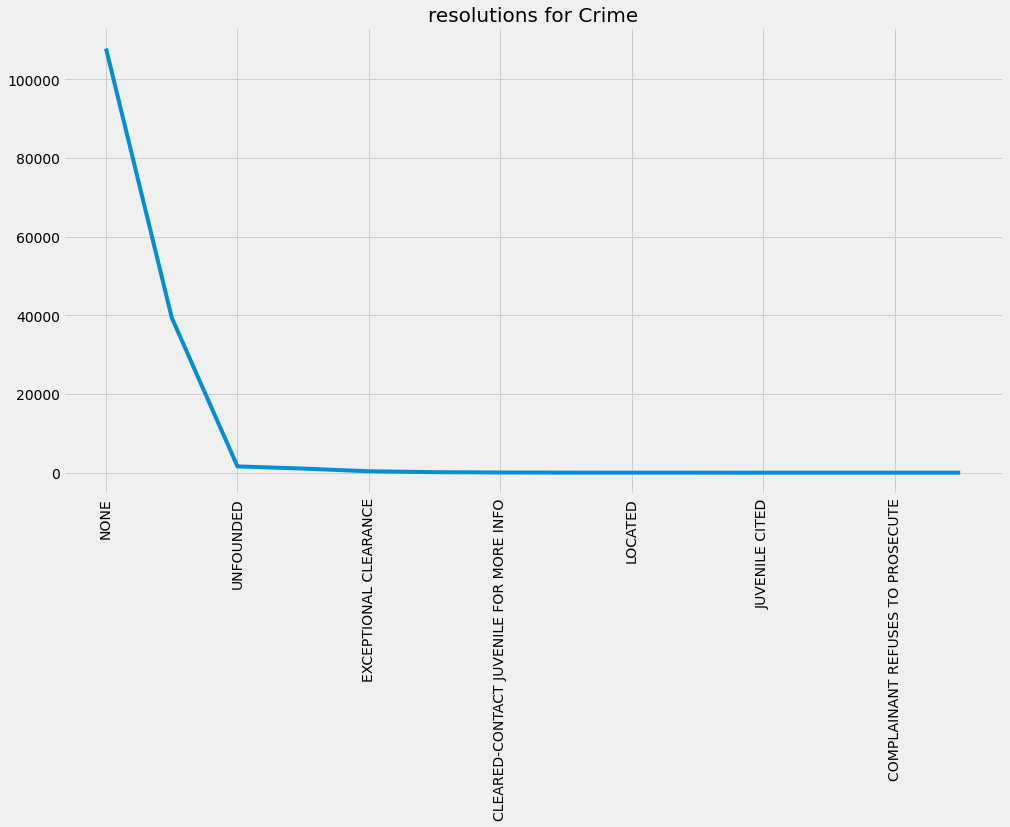

In [ ]:
# Regions with resolution of crimes

data['resolution'].value_counts().plot.line(figsize = (15, 8))

plt.title('resolutions for Crime',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

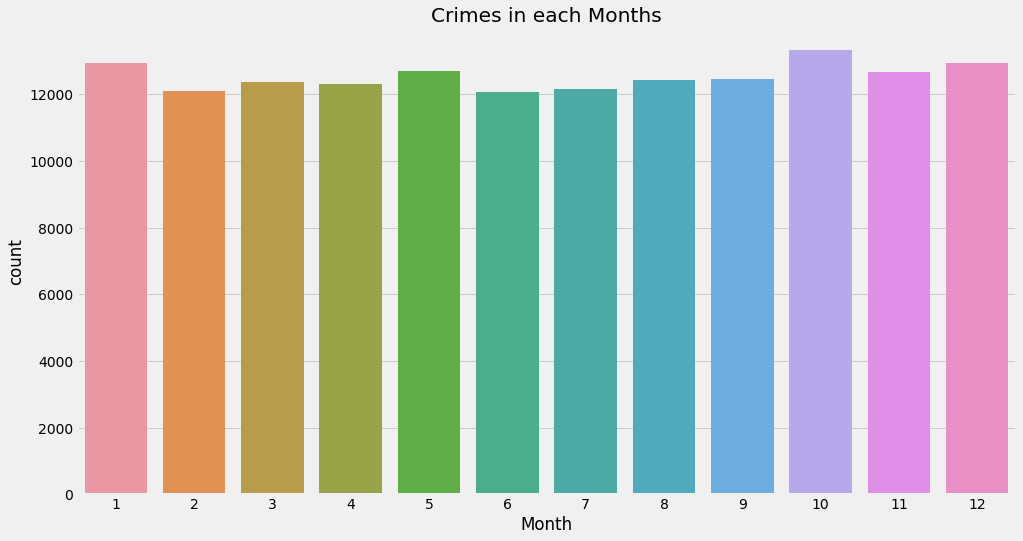

In [ ]:
#Visualizing crime for every month
plt.figure(figsize=(15,8))

data['Month'] = data['crime_date'].dt.month
sns.countplot(data['Month'])
plt.title('Crimes in each Months')

plt.show()

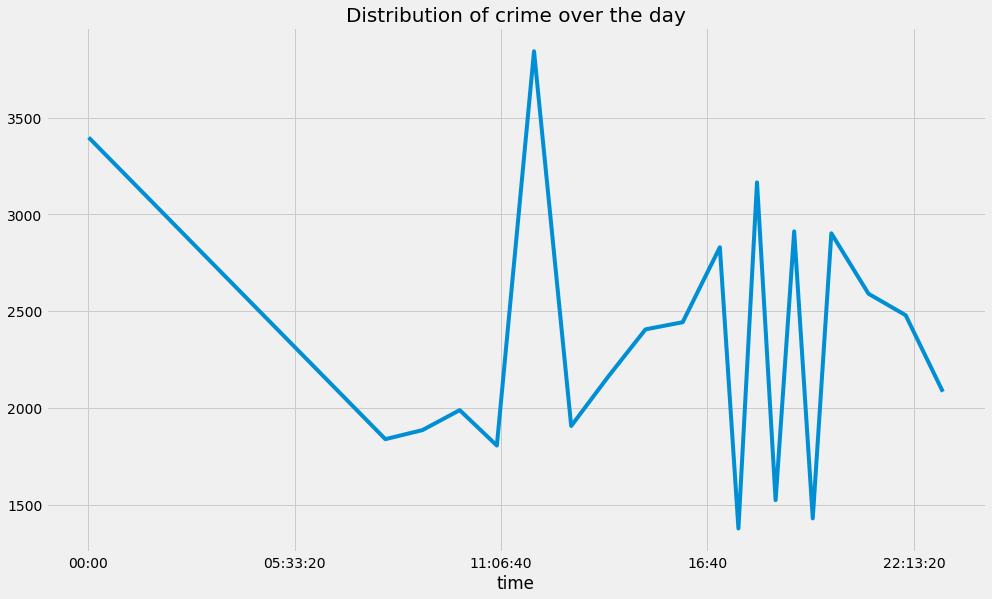

In [ ]:
# checking the time at which crime occurs mostly


data['Time'].value_counts().head(20).plot.line(figsize = (15, 9))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

In [ ]:
t = data.department_district.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28446
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


## Geospatial Visualization

In [ ]:
import folium
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

In [ ]:
#generate map
sf_map.choropleth(
    geo_data=gjson,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

sf_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
#Calculate the skew

skew = data.skew()
print(skew)

incident_id      105.864514
department_id    105.864515
Month             -0.019158
dtype: float64


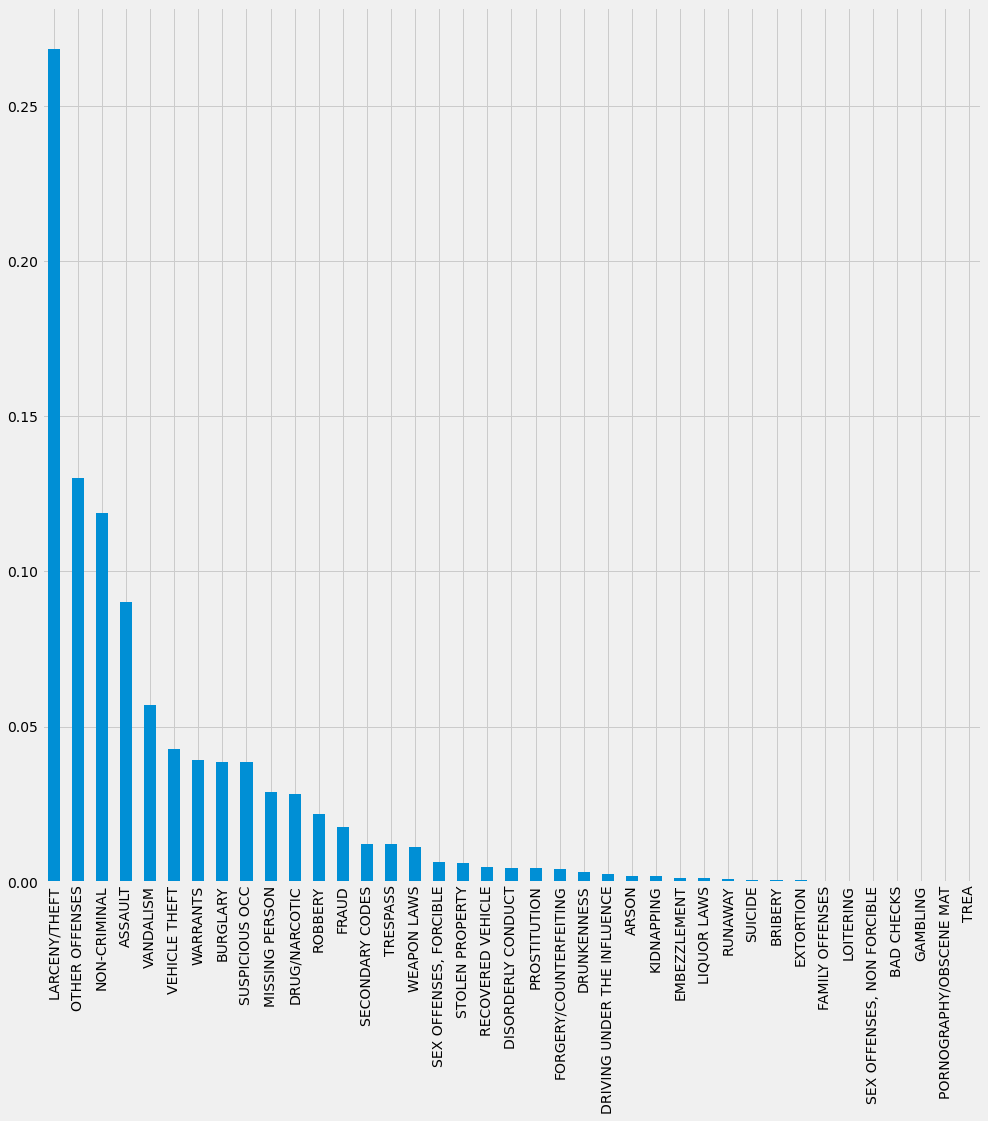

In [ ]:
(data.category.value_counts().sort_values(ascending=False)/data.shape[0]).plot(kind='bar')

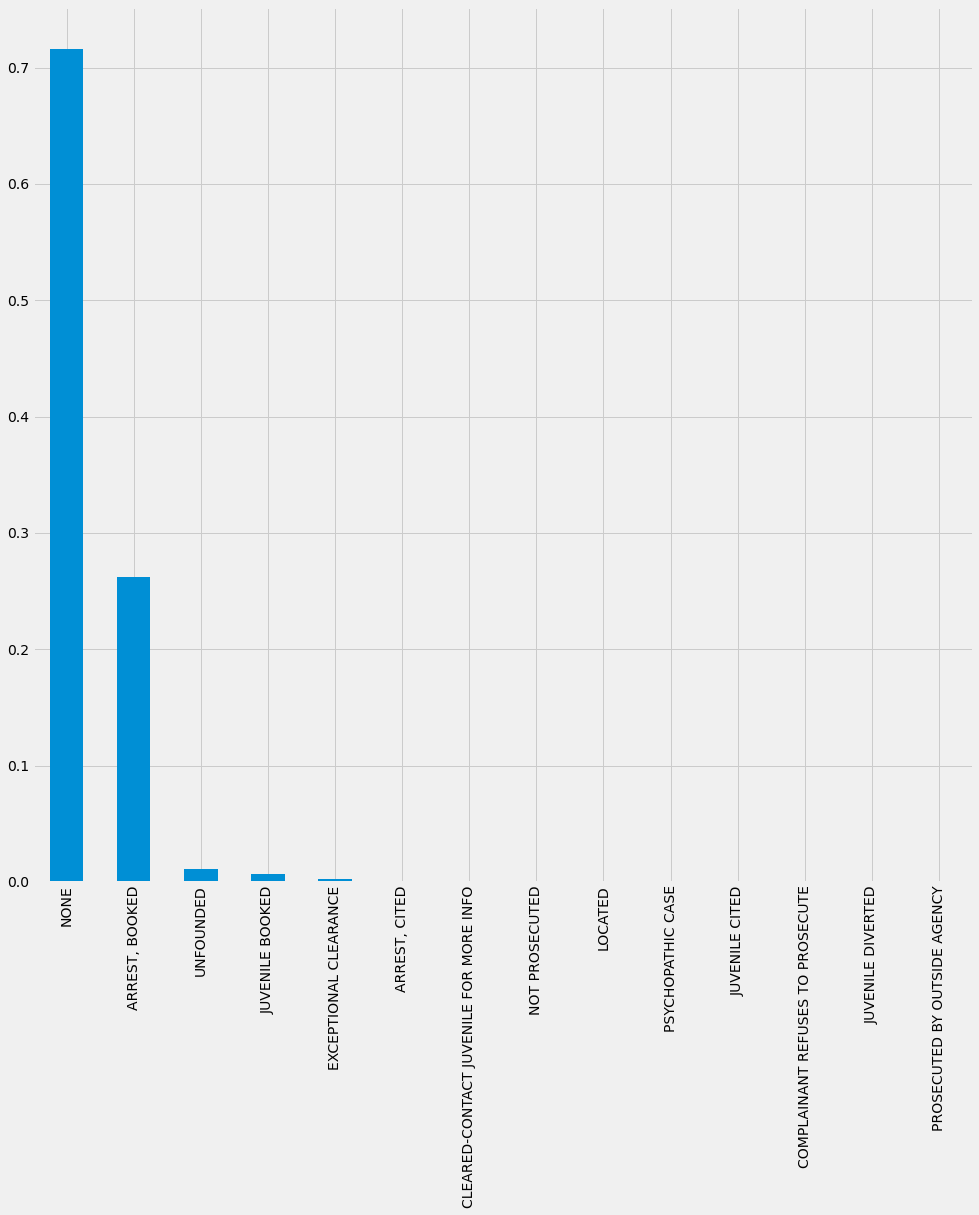

In [ ]:
#It's the Theft that happens in common in the city of SF. Quite surprising given the fact that its a major city with all the tech advances. 
#Let's check what % of crimes are resolved and what type of crimes are resolved the most.
(data.resolution.value_counts().sort_values(ascending=False)/data.shape[0]).plot(kind='bar')

In [ ]:
data.resolution.unique()

array(['ARREST, BOOKED', 'NONE', 'JUVENILE BOOKED', 'ARREST, CITED',
       'UNFOUNDED', 'JUVENILE DIVERTED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'EXCEPTIONAL CLEARANCE',
       'LOCATED', 'PSYCHOPATHIC CASE', 'COMPLAINANT REFUSES TO PROSECUTE',
       'NOT PROSECUTED', 'PROSECUTED BY OUTSIDE AGENCY', 'JUVENILE CITED'],
      dtype=object)

In [ ]:
data.groupby(['category','resolution']).size().reset_index(name='count').sort_values(by='count',ascending=False)

,category,resolution,count
78,LARCENY/THEFT,NONE,38574
102,NON-CRIMINAL,NONE,15843
107,OTHER OFFENSES,"ARREST, BOOKED",12061
12,ASSAULT,NONE,7936
179,VANDALISM,NONE,7569
...,...,...,...
151,"SEX OFFENSES, NON FORCIBLE",UNFOUNDED,1
161,SUSPICIOUS OCC,COMPLAINANT REFUSES TO PROSECUTE,1
54,FAMILY OFFENSES,NOT PROSECUTED,1
153,STOLEN PROPERTY,"ARREST, CITED",1


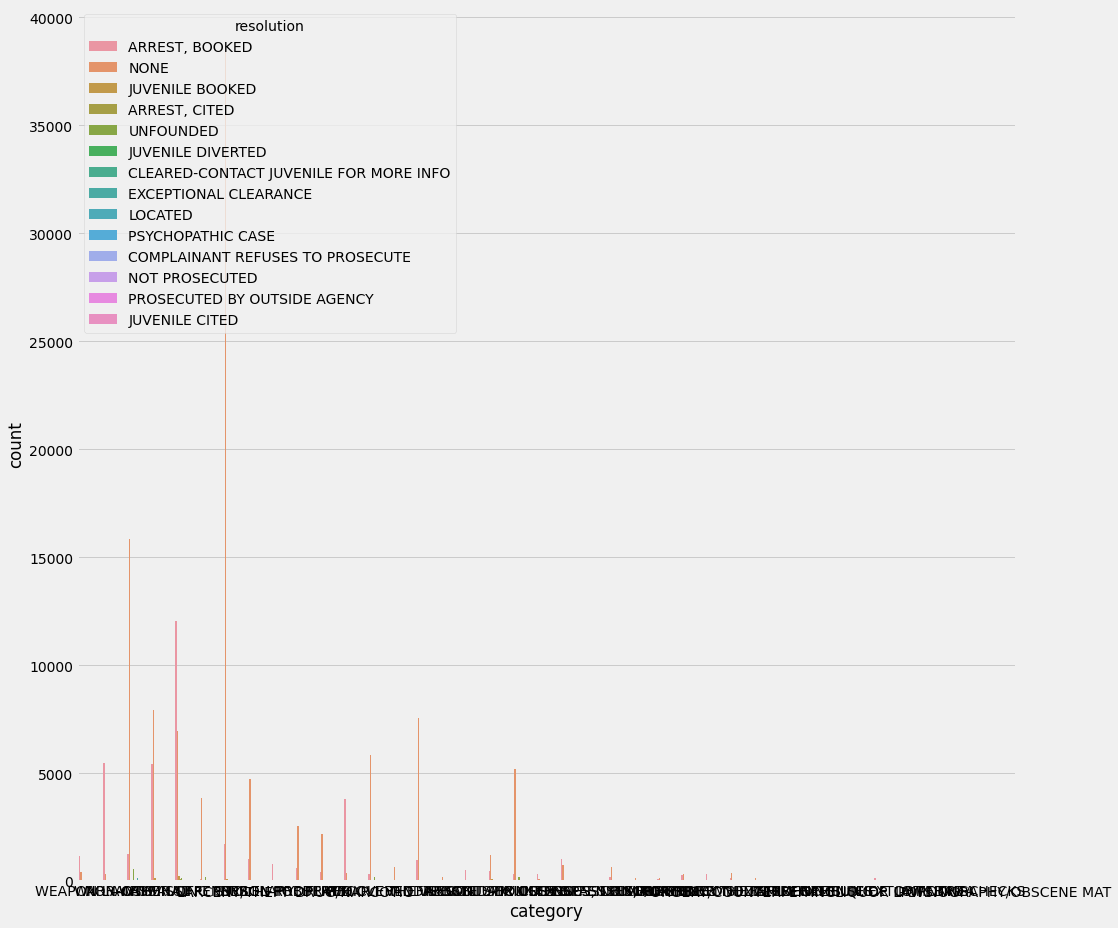

In [ ]:
sns.countplot(x='category', hue='resolution', data=data)

In [ ]:
#We can't make sense of the data that's being plotted above.
# Let's make a small change to our dataset and derive a new feature called is_resolved where 
#the value is 1 if the case was resolved and 0 if not. 
#For simplicity lets take the values 'ARREST, BOOKED', 'ARREST, CITED', 'PSYCHOPATHIC CASE','JUVENILE BOOKED', 
#'LOCATED','CLEARED-CONTACT JUVENILE FOR MORE INFO', 'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE', 'JUVENILE ADMONISHED', 
#'JUVENILE CITED', 'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE' as reolved and 'NONE','UNFOUNDED','EXCEPTIONAL CLEARANCE','NOT PROSECUTED',
#'DISTRICT ATTORNEY REFUSES TO PROSECUTE' as not resolved.

In [ ]:
resolved = ['ARREST, BOOKED', 'ARREST, CITED', 'PSYCHOPATHIC CASE','JUVENILE BOOKED', \
			'LOCATED','CLEARED-CONTACT JUVENILE FOR MORE INFO', 'JUVENILE DIVERTED', \
			'COMPLAINANT REFUSES TO PROSECUTE', 'JUVENILE ADMONISHED', 'JUVENILE CITED', \
			'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE']
def is_resolved(resolution):
	if resolution in resolved:
		return 1
	return 0

In [ ]:
data['is_resolved']=data.resolution.apply(is_resolved)

In [ ]:
data.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,Date,Time,latitude,longitude,Month,is_resolved
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)",2016-01-29,11:00:00,(37.775420706711,-122.403404791479),1,1
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)",2016-01-29,11:00:00,(37.775420706711,-122.403404791479),1,1
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)",2016-04-25,14:59:00,(37.7299809672996,-122.388856204292),4,1
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)",2016-01-05,23:50:00,(37.7857883766888,-122.412970537591),1,0
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)",2016-01-01,00:30:00,(37.7650501214668,-122.419671780296),1,0


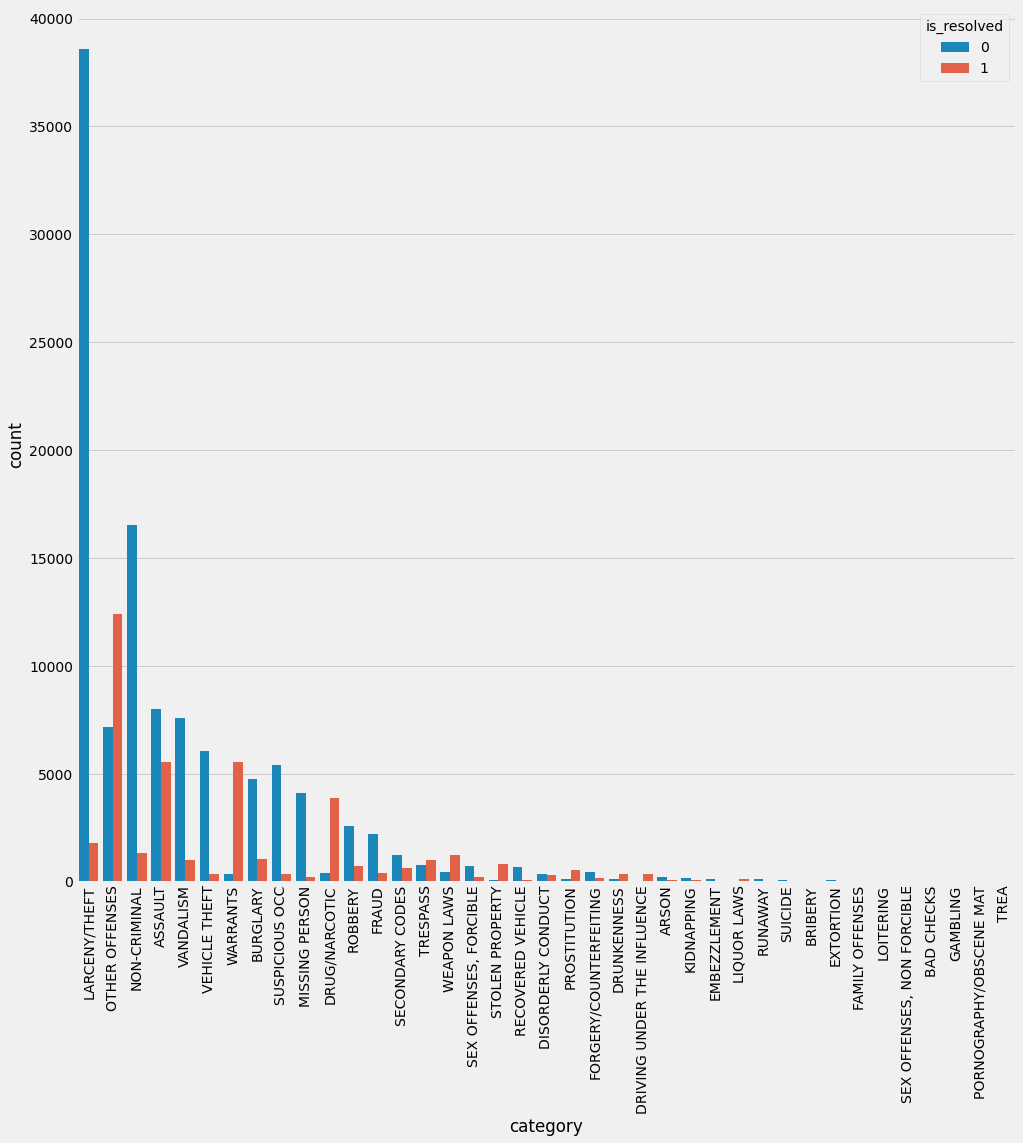

In [ ]:
sns.countplot(x='category', hue='is_resolved', data=data,order = data.category.value_counts().index)
plt.xticks(rotation=90)
plt.show()

It looks like out of all the cases reported more than 60% of the cases don't get resolved and from the categories of crimes reported Theft has a very low probability of getting resolved. Also, what's interesting to see from the plot is that major % of cases reported under DRUG/NARCOTIC get resolved. Ofcourse, no country wants drug infestation, so they have high priority.

Now let's take a look at number of crimes reported based on timestamps and day of the week and answer the following questions.



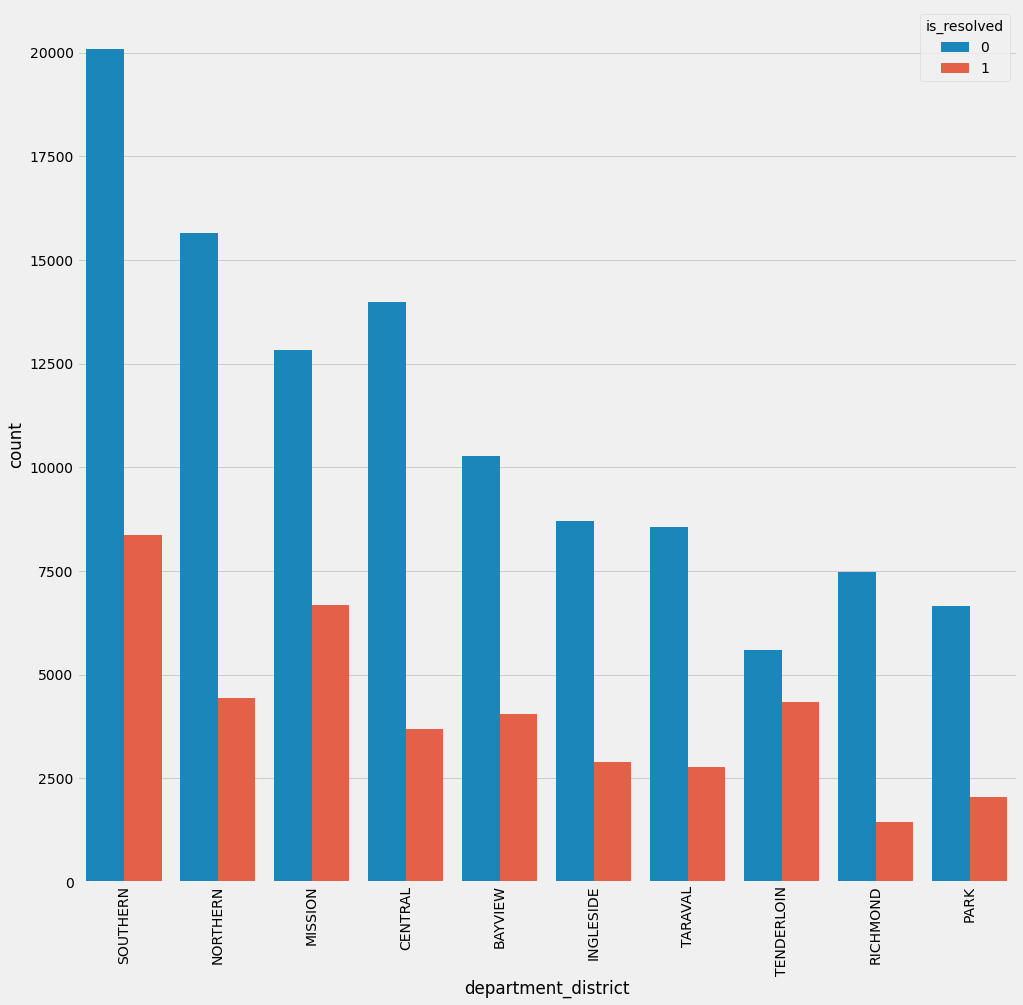

In [ ]:
#to check which department district has most resolved cases
sns.countplot(x='department_district', hue='is_resolved', data=data,order = data.department_district.value_counts().index)
plt.xticks(rotation=90)
plt.show()

## Observations
LARCENY/THEFT and OTHER OFFENSES happen to be the top 2 crimes reported in San francisco.

Major number of crimes are reported at the Southern District and Southern District happen to have resolved a vast % of cases they received.
Out of all the cases reported more than 60% of the cases don't get resolved and from the categories of crimes reported LARCENY/THEFT has a very low probability of getting resolved. Also, what was interesting to see from the plot is that major % of cases reported under DRUG/NARCOTIC get resolved. Ofcourse, no country wants drug infestation, so they have high priority.


## Modelling

Now let's try to build a simple model based on the data we have to see if a given crime will be resolved or not. Let's use following features that we already have:

Category

department_district

is_resolved (Predicting column)

Date

Time

Latitude

Longitude

In [ ]:
#Let's define our X & Y

features = ["Date","Time","category", "department_district",  "latitude", "longitude"]
X = data[features]
y = data["is_resolved"]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
X_new=encoder.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting the training set into Training and Testing sets
seed = 10
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X_new,y, test_size = test_size, random_state = seed)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test,Y_predict,digits=6))

              precision    recall  f1-score   support

           0   0.898590  0.927646  0.912887     21989
           1   0.785000  0.716188  0.749017      8111

    accuracy                       0.870664     30100
   macro avg   0.841795  0.821917  0.830952     30100
weighted avg   0.867981  0.870664  0.868729     30100



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = dtree.predict(X_test)

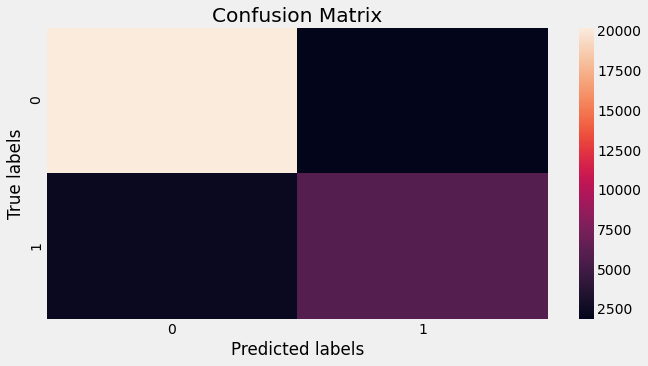

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

cm = confusion_matrix(Y_test,predictions)
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cm, annot=False, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
print (classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     21989
           1       0.76      0.72      0.74      8111

    accuracy                           0.86     30100
   macro avg       0.83      0.82      0.82     30100
weighted avg       0.86      0.86      0.86     30100



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40,min_samples_split=100 )
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)
print (classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     21989
           1       0.83      0.70      0.76      8111

    accuracy                           0.88     30100
   macro avg       0.86      0.82      0.84     30100
weighted avg       0.88      0.88      0.88     30100



In [ ]:
y_pred_proba = rfc.predict_proba(X_test)
y_pred_proba

array([[0.69442251, 0.30557749],
       [0.7346452 , 0.2653548 ],
       [0.95192107, 0.04807893],
       ...,
       [0.97758943, 0.02241057],
       [0.95218275, 0.04781725],
       [0.3026065 , 0.6973935 ]])

In [ ]:
result = pd.DataFrame(y_pred_proba)
result.head()

,0,1
0,0.694423,0.305577
1,0.734645,0.265355
2,0.951921,0.048079
3,0.221610,0.778390
4,0.968005,0.031995


In [ ]:
result.to_csv(path_or_buf="submission.csv",index=True, index_label = 'Id')

In [ ]:
from google.colab import files

files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>